# **Intro**

In [ ]:
%load_ext google.colab.data_table
from google.colab import data_table
import pandas as pd
import numpy as np
import re
from typing import List
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/Data_With_Features_Syntax.csv")

In [ ]:
data.head(2)

,Unnamed: 0,art_id,art_content,art_content_html,art_extract_datetime,art_lang,art_title,art_url,src_name,src_type,src_url,src_img,art_auth,art_tag,Nb_key_words,Nb_key_words_title,Nb_words,Nb_words_title,Nb_sentences,average_word_sentence,ratio_word_title_on_word,exclamation,interrogation,ratio_key_words,ratio_key_sentences,ratio_key_word_title,netloc.com,nb_word_path,content_postive_score,title_postive_score,content_negative_score,title_negative_score,content_polarity_score,title_polarity_score,content_subjectivity_score,title_subjectivity_score
0,0,0,NaN,NaN,7 décembre 2018,fr,4ème Conférence Nationale de l’Emploi Territor...,http://fncdg.com/4eme-conference-nationale-de-...,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2018/12/ra...,NaN,NaN,0,0,0,8,0,NaN,inf,0,0,0.0,0.0,0.0,['.com'],11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,La FNCDG et l’ANDCDG ont publié en septembre l...,"<p style=""text-align: justify;"">La FNCDG et l’...",22 septembre 2020,fr,9ème édition du Panorama de l’emploi territorial,http://fncdg.com/9eme-edition-du-panorama-de-l...,FNCDG,xpath_source,http://fncdg.com/actualites/,http://fncdg.com/wp-content/uploads/2020/09/im...,NaN,NaN,0,0,40,7,3,13.333333,0.175,0,0,0.0,0.0,0.0,['.com'],7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Fonction 1**

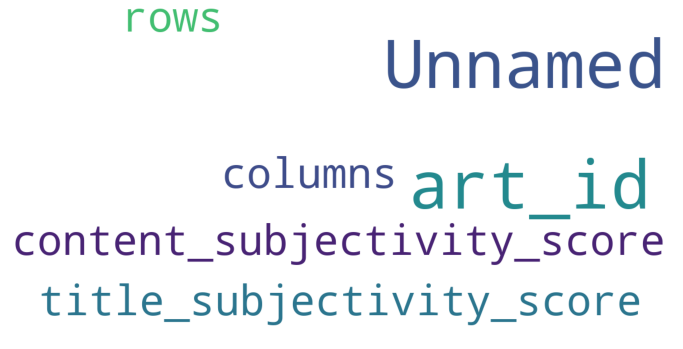

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data)

# **ACP**


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import sklearn
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
import numpy
import matplotlib.pyplot as plt

None


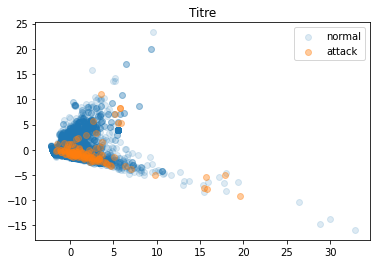

In [ ]:
def acp():
    data = pd.read_csv("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/Data_With_Features_Syntax.csv")
    data.drop(["Unnamed: 0","art_id","art_content","art_content_html","art_extract_datetime","art_lang","art_title",
              "art_url","src_name","src_type","src_url","src_img","art_auth","art_tag","title_postive_score","title_negative_score",
              "title_polarity_score","title_subjectivity_score","netloc.com","ratio_word_title_on_word"],axis = 1, inplace = True)
    data["average_word_sentence"] = data["average_word_sentence"].fillna(0)
    clf = LocalOutlierFactor(n_neighbors=2, contamination = 0.01)
    y = clf.fit_predict(data)

    #instanciation
    sc = StandardScaler()
    #transformation – centrage-réduction
    X = sc.fit_transform(data)

    pca = PCA(n_components=10)
    X = pca.fit_transform(X)

    plt.title('Titre')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], alpha=0.15, label='normal')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], alpha=0.4, label='attack')
    plt.legend()

print(acp())